In [1]:
import pandas as pd

In [2]:
legitimate_urls = pd.read_csv("legitimate-urls.csv")
phishing_urls = pd.read_csv("phishing-urls.csv")

In [3]:
legitimate_urls.head(10)
phishing_urls.head(10)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,asesoresvelfit.com,0,0,/media/datacredito.co/,0,http,0,0,0,0,0,1,0,1,0,1,1
1,caixa.com.br.fgtsagendesaqueconta.com,0,0,/consulta8523211/principal.php,0,http,0,1,1,0,0,1,0,1,1,0,1
2,hissoulreason.com,0,0,/js/homepage/home/,0,http,0,0,0,0,0,1,0,1,0,0,1
3,unauthorizd.newebpage.com,0,0,/webapps/66fbf/,0,http,0,0,0,0,0,1,0,1,1,0,1
4,133.130.103.10,0,1,/23/,0,http,0,2,0,1,0,1,0,1,0,0,1
5,dj00.co.vu,1,0,/css/,0,http,0,0,2,1,1,1,0,1,1,0,0
6,133.130.103.10,0,1,/21/logar/,0,http,0,2,0,1,0,1,0,1,0,0,1
7,httpssicredi.esy.es,0,0,/servico/sicredi/validarclientes/mobi/index.php,0,http,0,2,2,1,1,1,1,1,1,0,1
8,gamesaty.ga,0,0,/wp-content///yh/en/,0,http,1,0,2,1,0,1,0,1,0,0,1
9,luxuryupgradepro.com,0,0,/ymailNew/ymailNew/,0,http,0,0,0,0,0,1,0,1,0,0,1


In [4]:
urls = legitimate_urls.append(phishing_urls)


In [5]:
urls.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1


In [6]:
urls = urls.drop(urls.columns[[0,3,5]],axis=1)

In [7]:
urls = urls.sample(frac=1).reset_index(drop=True)

In [8]:
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']


#### splitting the data into train data and test data

Dividing the data in the ratio of 70:30 - train:test

In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [10]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1410 605 1410 605


In [11]:
labels_train.value_counts()


0    707
1    703
Name: label, dtype: int64

In [12]:

labels_test.value_counts()

0    310
1    295
Name: label, dtype: int64

#### Creating the model

creating the model with default parameters

In [26]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
random_forest_classifier = RandomForestClassifier()

In [27]:
random_forest_classifier.fit(data_train,labels_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predicting the result for test data

In [28]:
prediction_label = random_forest_classifier.predict(data_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cpnfusionMatrix = confusion_matrix(labels_test,prediction_label)
accuracy_score(labels_test,prediction_label)

0.8380165289256198

### Improving the efficiency of model by specifying max_depth as well as number of tress 

In [30]:
custom_random_forest_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, max_leaf_nodes=10000)

In [31]:
custom_random_forest_classifier.fit(data_train,labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=10000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
custom_classifier_prediction_label = custom_random_forest_classifier.predict(data_test)

In [33]:
#from sklearn.metrics import confusion_matrix,accuracy_score
confusionMatrix2 = confusion_matrix(labels_test,custom_classifier_prediction_label)
accuracy_score(labels_test,custom_classifier_prediction_label)

0.8446280991735537

## Feature Importance Plot


Feature ranking:

Feature name : Importance
1 URL_Length   :  0.22024378954923768 

2 web_traffic   :  0.1820029806623967 

3 statistical_report   :  0.15421291697529382 

4 Sub_domains   :  0.08616574344714627 

5 age_domain   :  0.08276957044981223 

6 dns_record   :  0.07719994244829632 

7 domain_registration_length   :  0.07148975935775849 

8 tiny_url   :  0.05336792509217665 

9 Prefix_suffix_separation   :  0.052487607679427076 

10 Having_IP   :  0.006529491136200653 

11 Having_@_symbol   :  0.006336183837034796 

12 Redirection_//_symbol   :  0.006109975991999187 

13 http_tokens   :  0.0010841133732201313 



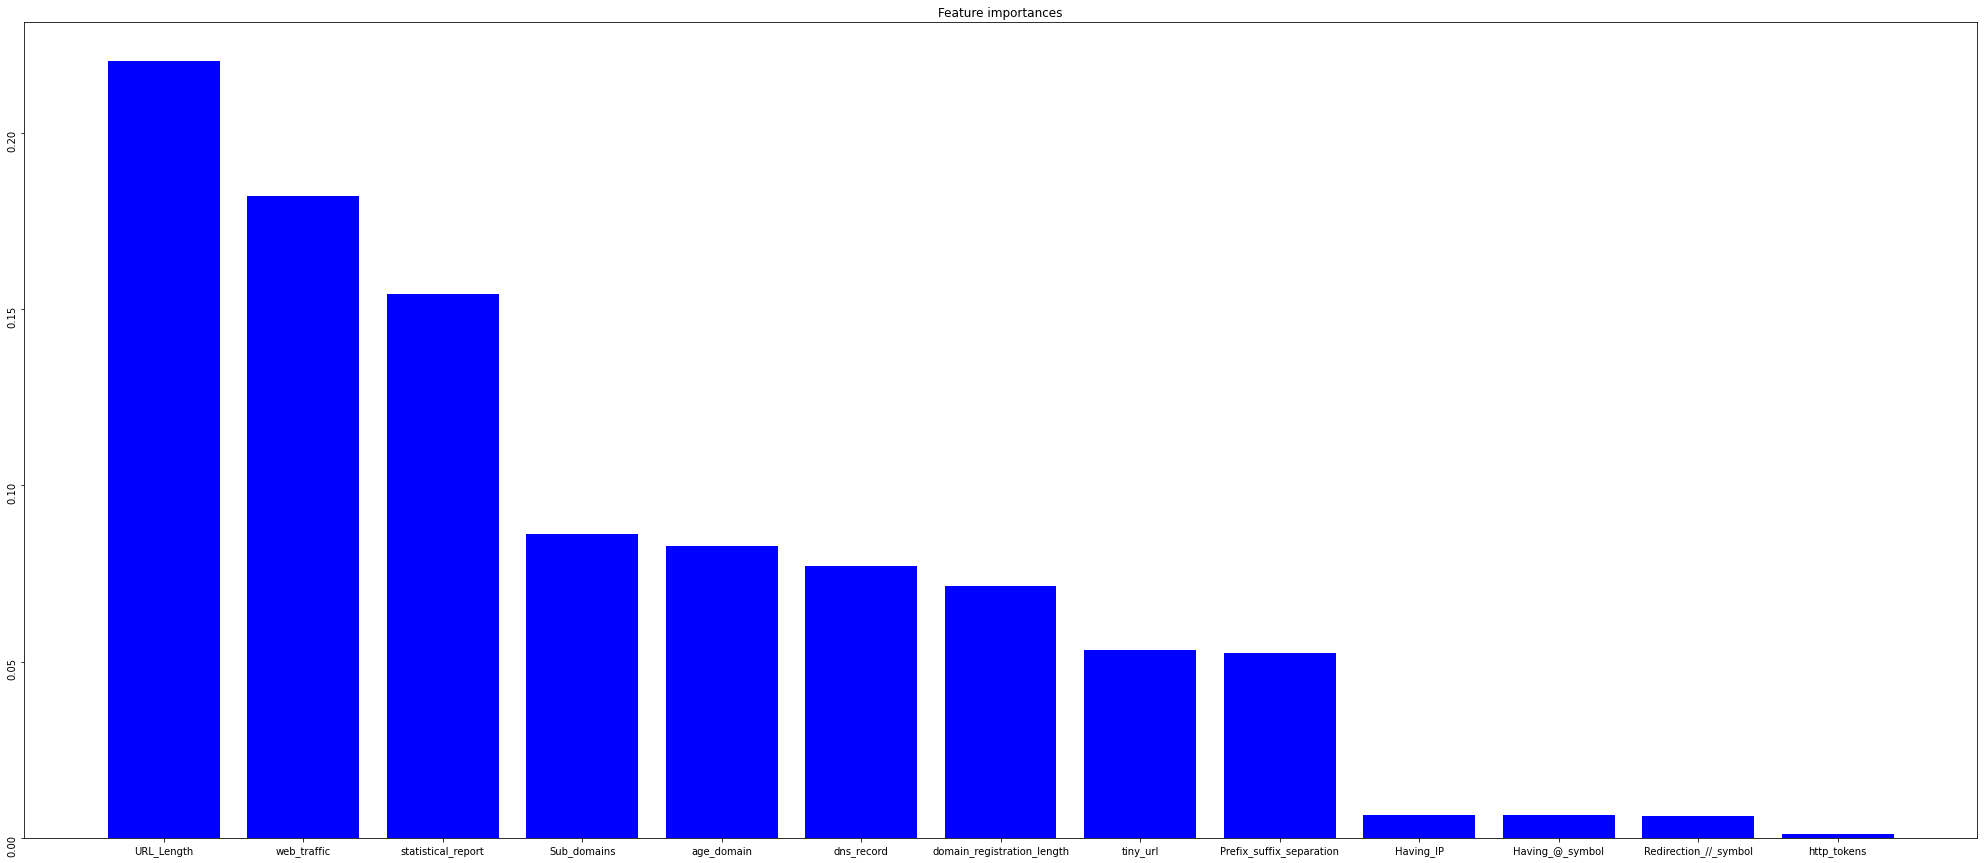

In [38]:
import matplotlib.pyplot as plt
import numpy as np

importances = custom_random_forest_classifier.feature_importances_

indices = np.argsort(importances)[::-1] 
print("\nFeature ranking:\n")
print("Feature name : Importance")

for f in range(data_train.shape[1]):
    print(f"{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[indices],
       color="b", align="center")   

plt.xticks(range(data_train.shape[1]), data_train.columns[indices])
plt.xlim([-1, data_train.shape[1]])
plt.yticks(rotation='vertical')

plt.rcParams['figure.figsize'] = (35,15)  #this will increase the size of the plot
plt.show()